In [19]:
!pip install pydeseq2
!pip install rpy2

In [ ]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.utils import get_num_processes
from pydeseq2.utils import make_MA_plot
from pydeseq2.utils import nbinomGLM
from pydeseq2.utils import wald_test

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

In [2]:
import pandas as pd

# Provide the full file path enclosed in quotation marks
file_path = "~/Desktop/Bioinfo Projects/counts_table.csv"

# Corrected code
counts = pd.read_csv(file_path)
counts

,Geneid,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
0,ENSG00000284662,0,0,0,0,0,0,0,0
1,ENSG00000186827,0,0,1,1,4,0,0,3
2,ENSG00000186891,1,0,0,0,0,2,2,2
3,ENSG00000160072,361,427,416,549,328,174,246,202
4,ENSG00000041988,118,156,124,133,101,56,85,89
...,...,...,...,...,...,...,...,...,...
60658,ENSG00000271254,56,55,54,76,47,67,49,53
60659,ENSG00000275987,0,0,1,0,0,0,0,0
60660,ENSG00000268674,0,0,0,0,0,0,0,0
60661,ENSG00000277475,0,0,0,0,0,0,0,0


In [3]:
counts = counts.set_index('Geneid')
counts

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
Geneid,,,,,,,,
ENSG00000284662,0,0,0,0,0,0,0,0
ENSG00000186827,0,0,1,1,4,0,0,3
ENSG00000186891,1,0,0,0,0,2,2,2
ENSG00000160072,361,427,416,549,328,174,246,202
ENSG00000041988,118,156,124,133,101,56,85,89
...,...,...,...,...,...,...,...,...
ENSG00000271254,56,55,54,76,47,67,49,53
ENSG00000275987,0,0,1,0,0,0,0,0
ENSG00000268674,0,0,0,0,0,0,0,0


In [8]:
counts = counts[counts.sum(axis = 1) > 0]
counts

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
Geneid,,,,,,,,
ENSG00000186827,0,0,1,1,4,0,0,3
ENSG00000186891,1,0,0,0,0,2,2,2
ENSG00000160072,361,427,416,549,328,174,246,202
ENSG00000041988,118,156,124,133,101,56,85,89
ENSG00000260179,2,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...
ENSG00000278817,0,0,1,0,1,0,1,0
ENSG00000278384,2,7,6,5,8,2,2,1
ENSG00000276345,20,0,0,0,0,12,0,0


In [4]:
counts = counts.T
counts

Geneid,ENSG00000284662,ENSG00000186827,ENSG00000186891,ENSG00000160072,ENSG00000041988,ENSG00000260179,ENSG00000234396,ENSG00000225972,ENSG00000224315,ENSG00000198744,...,ENSG00000276351,ENSG00000276345,ENSG00000273532,ENSG00000275063,ENSG00000277856,ENSG00000271254,ENSG00000275987,ENSG00000268674,ENSG00000277475,ENSG00000275405
Ctr_s1,0,0,1,361,118,2,0,6,0,1,...,0,20,0,0,0,56,0,0,0,0
Ctr_s2,0,0,0,427,156,0,0,2,0,494,...,0,0,0,0,0,55,0,0,0,0
Ctr_s7,0,1,0,416,124,1,0,3,0,6,...,0,0,0,0,0,54,1,0,0,0
Ctr_s13,0,1,0,549,133,2,0,4,0,4,...,0,0,0,0,0,76,0,0,0,0
RS_s6,0,4,0,328,101,0,0,8,1,624,...,0,0,0,0,0,47,0,0,0,0
RS_s9,0,0,2,174,56,1,0,1,0,0,...,0,12,0,0,0,67,0,0,0,0
RS_s12,0,0,2,246,85,0,0,3,0,4,...,0,0,0,0,0,49,0,0,0,0
RS_s16,0,3,2,202,89,0,0,5,0,3,...,0,0,0,0,0,53,0,0,0,0


In [6]:
metadata = pd.DataFrame(zip(counts.index, ['C','C','C','C', 'RS', 'RS', 'RS', 'RS']),
                        columns = ['Sample', 'Condition'])

In [7]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
Ctr_s1,C
Ctr_s2,C
Ctr_s7,C
Ctr_s13,C
RS_s6,RS
RS_s9,RS
RS_s12,RS
RS_s16,RS


In [17]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

dds = DeseqDataSet(counts=counts,
            metadata=metadata,
            design_factors="Condition")
dds.deseq2()

Fitting size factors...
... done in 0.04 seconds.

Fitting dispersions...
... done in 6.21 seconds.

Fitting dispersion trend curve...
... done in 13.21 seconds.

C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\anndata\_core\views.py:144: RuntimeWarning: invalid value encountered in log
  results = super().__array_ufunc__(
Fitting MAP dispersions...
... done in 13.11 seconds.

C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\pydeseq2\dds.py:695: RuntimeWarning: invalid value encountered in log
  self.varm["_outlier_genes"] = np.log(self.varm["genewise_dispersions"]) > np.log(
Fitting LFCs...
... done in 7.48 seconds.

Refitting 0 outliers.



In [20]:
dds

AnnData object with n_obs × n_vars = 8 × 60663
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [22]:
stat_res = DeseqStats(dds, n_cpus=8, contrast = ('Condition','RS','C'))

In [23]:
stat_res.summary()

Running Wald tests...
... done in 8.36 seconds.



Log2 fold change & Wald test p-value: Condition RS vs C


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000284662,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000186827,1.107782,2.119166,1.486697,1.425419,0.154036,NaN
ENSG00000186891,1.071147,2.761974,1.566738,1.762882,0.077920,NaN
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013213
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.174230
...,...,...,...,...,...,...
ENSG00000271254,58.543851,0.316375,0.333484,0.948695,0.342776,0.656905
ENSG00000275987,0.108747,-0.300576,3.869272,-0.077683,0.938080,NaN
ENSG00000268674,0.000000,NaN,NaN,NaN,NaN,NaN


In [24]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000284662,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000186827,1.107782,2.119166,1.486697,1.425419,0.154036,NaN
ENSG00000186891,1.071147,2.761974,1.566738,1.762882,0.077920,NaN
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013213
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.174230
...,...,...,...,...,...,...
ENSG00000271254,58.543851,0.316375,0.333484,0.948695,0.342776,0.656905
ENSG00000275987,0.108747,-0.300576,3.869272,-0.077683,0.938080,NaN
ENSG00000268674,0.000000,NaN,NaN,NaN,NaN,NaN


In [25]:
%pip install sanbomics

In [26]:
from sanbomics.tools import id_map

In [27]:
mapper = id_map(species = 'human')

In [28]:
res['Symbol'] = res.index.map(mapper.mapper)

In [29]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000284662,0.000000,NaN,NaN,NaN,NaN,NaN,OR4F16
ENSG00000186827,1.107782,2.119166,1.486697,1.425419,0.154036,NaN,TNFRSF4
ENSG00000186891,1.071147,2.761974,1.566738,1.762882,0.077920,NaN,TNFRSF18
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013213,ATAD3B
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.174230,THAP3
...,...,...,...,...,...,...,...
ENSG00000271254,58.543851,0.316375,0.333484,0.948695,0.342776,0.656905,AC240274.1
ENSG00000275987,0.108747,-0.300576,3.869272,-0.077683,0.938080,NaN,NaN
ENSG00000268674,0.000000,NaN,NaN,NaN,NaN,NaN,AC213203.1


In [30]:
res = res[res.baseMean >= 10]
res


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013213,ATAD3B
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.174230,THAP3
ENSG00000198744,120.137318,0.569431,2.236123,0.254651,NaN,NaN,MTCO3P12
ENSG00000142611,23.766575,-1.889206,0.883023,-2.139474,0.032397,0.180876,PRDM16
ENSG00000225630,922.811465,0.732964,0.408622,1.793748,0.072853,0.294006,MTND2P28
...,...,...,...,...,...,...,...
ENSG00000198727,46929.471443,0.271032,0.268363,1.009947,0.312521,0.629687,MT-CYB
ENSG00000210196,77.259551,0.457372,0.223366,2.047635,0.040596,0.207344,MT-TP
ENSG00000276256,32.825088,-0.834185,0.632601,-1.318659,0.187283,0.488457,AC011043.1


In [32]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000069424,231.438079,1.135128,0.276396,4.106888,4.010261e-05,1.353341e-03,KCNAB2
ENSG00000116254,16.685968,2.713808,0.659952,4.112128,3.920294e-05,1.333876e-03,CHD5
ENSG00000204138,315.739587,-0.543588,0.131546,-4.132290,3.591673e-05,1.250037e-03,PHACTR4
ENSG00000198830,1111.179223,-1.207821,0.352071,-3.430615,6.022151e-04,1.050556e-02,HMGN2
ENSG00000060688,363.794327,-0.623651,0.093196,-6.691831,2.203959e-11,1.148194e-08,SNRNP40
...,...,...,...,...,...,...,...
ENSG00000160298,76.683762,-1.196214,0.364446,-3.282282,1.029704e-03,1.571996e-02,C21orf58
ENSG00000159055,123.457054,-0.951653,0.321382,-2.961125,3.065173e-03,3.543655e-02,MIS18A
ENSG00000160193,135.509940,-0.712941,0.252288,-2.825895,4.714877e-03,4.822192e-02,WDR4


In [34]:
!pip install scanpy

In [36]:
import scanpy as sc


In [37]:
dds

AnnData object with n_obs × n_vars = 8 × 60663
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [38]:
sc.tl.pca(dds)

C:\Users\alqua\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


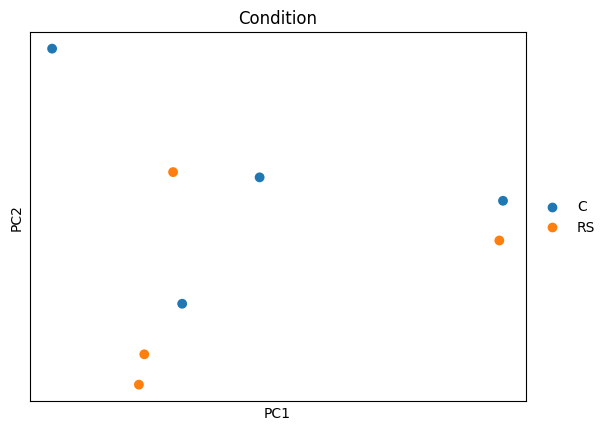

In [10]:
sc.pl.pca(dds, color = 'Condition', size = 200)

In [39]:
#GSEA
! pip install gseapy
import gseapy as gp
from gseapy.plot import gseaplot

In [40]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000160072,320.481168,-0.492175,0.147030,-3.347457,0.000816,0.013213,ATAD3B
ENSG00000041988,103.354977,-0.282138,0.130485,-2.162226,0.030601,0.174230,THAP3
ENSG00000198744,120.137318,0.569431,2.236123,0.254651,NaN,NaN,MTCO3P12
ENSG00000142611,23.766575,-1.889206,0.883023,-2.139474,0.032397,0.180876,PRDM16
ENSG00000225630,922.811465,0.732964,0.408622,1.793748,0.072853,0.294006,MTND2P28
...,...,...,...,...,...,...,...
ENSG00000198727,46929.471443,0.271032,0.268363,1.009947,0.312521,0.629687,MT-CYB
ENSG00000210196,77.259551,0.457372,0.223366,2.047635,0.040596,0.207344,MT-TP
ENSG00000276256,32.825088,-0.834185,0.632601,-1.318659,0.187283,0.488457,AC011043.1


In [41]:
ranking = res[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking

,Symbol,stat
Geneid,,
ENSG00000040341,STAU2,10.143220
ENSG00000145390,USP53,8.254562
ENSG00000106366,SERPINE1,7.809237
ENSG00000261115,TMEM178B,7.735058
ENSG00000197746,PSAP,7.382811
...,...,...
ENSG00000164163,ABCE1,-9.725978
ENSG00000143549,TPM3,-9.793049
ENSG00000071626,DAZAP1,-9.828079


In [42]:
ranking = ranking.drop_duplicates('Symbol')
ranking

,Symbol,stat
Geneid,,
ENSG00000040341,STAU2,10.143220
ENSG00000145390,USP53,8.254562
ENSG00000106366,SERPINE1,7.809237
ENSG00000261115,TMEM178B,7.735058
ENSG00000197746,PSAP,7.382811
...,...,...
ENSG00000164163,ABCE1,-9.725978
ENSG00000143549,TPM3,-9.793049
ENSG00000071626,DAZAP1,-9.828079


In [43]:
manual_set = {'things':['STAU2', 'USP53', 'SERPINE1', 'TMEM178B', 'PSAP']}

In [44]:
pre_res = gp.prerank(rnk = ranking,
                     gene_sets = ['GO_Biological_Process_2021', manual_set],
                     seed = 6, permutation_num = 100)

2023-10-29 17:18:23,178 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [45]:
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,GO_Biological_Process_2021__translational term...,0.0,-0.618079,-2.516165
1,GO_Biological_Process_2021__double-strand brea...,0.0,-0.580936,-2.295083
2,GO_Biological_Process_2021__mitochondrial tran...,0.0,-0.612787,-2.414145
3,GO_Biological_Process_2021__mitotic chromosome...,0.0,-0.722123,-2.347517
4,GO_Biological_Process_2021__rRNA processing (G...,0.0,-0.686124,-2.821755
...,...,...,...,...
2240,GO_Biological_Process_2021__regulation of kera...,1.0,-0.212277,-0.646609
2241,GO_Biological_Process_2021__regulation of cell...,1.0,0.180727,0.591598
2242,GO_Biological_Process_2021__negative regulatio...,1.0,-0.218268,-0.684566
2243,GO_Biological_Process_2021__sphingolipid catab...,1.0,-0.251658,-0.660581


In [49]:
out_df.sort_values('nes').iloc[0].Term

'GO_Biological_Process_2021__microtubule cytoskeleton organization involved in mitosis (GO:1902850)'

[<Axes: xlabel='Gene Rank'>, <Axes: ylabel='Enrichment Score'>]

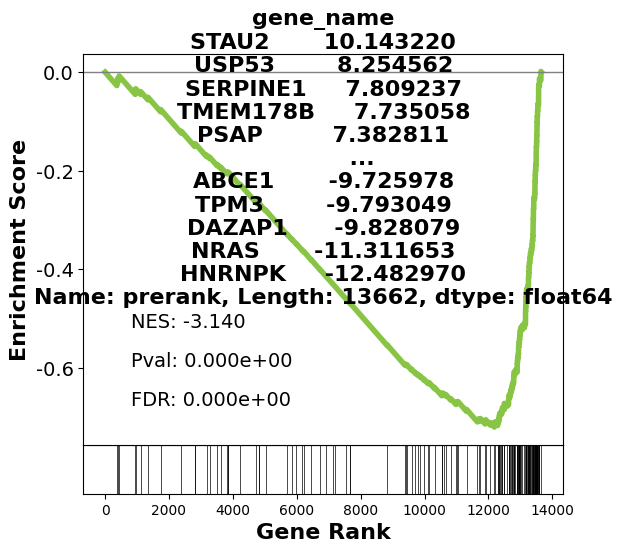

In [51]:
gseaplot(pre_res.ranking,
         Term = 'GO_Biological_Process_2021__mitotic spindle organization (GO:0007052)',
         **pre_res.results['GO_Biological_Process_2021__mitotic spindle organization (GO:0007052)'])

In [52]:
!pip install numpy
!pip install seaborn

In [53]:
import numpy as np
import seaborn as sns

In [54]:
dds.layers['normed_counts']

array([[0.        , 0.        , 0.99504649, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.86997733, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 3.12841738, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.08655037, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.53873778, 2.35915852, ..., 0.        , 0.        ,
        0.        ]])

In [55]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])
dds.layers['log1p']

array([[0.        , 0.        , 0.69066735, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.62592631, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.41789413, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.12705408, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.51264895, 1.2116905 , ..., 0.        , 0.        ,
        0.        ]])

In [56]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000069424,231.438079,1.135128,0.276396,4.106888,4.010261e-05,1.353341e-03,KCNAB2
ENSG00000116254,16.685968,2.713808,0.659952,4.112128,3.920294e-05,1.333876e-03,CHD5
ENSG00000204138,315.739587,-0.543588,0.131546,-4.132290,3.591673e-05,1.250037e-03,PHACTR4
ENSG00000198830,1111.179223,-1.207821,0.352071,-3.430615,6.022151e-04,1.050556e-02,HMGN2
ENSG00000060688,363.794327,-0.623651,0.093196,-6.691831,2.203959e-11,1.148194e-08,SNRNP40
...,...,...,...,...,...,...,...
ENSG00000160298,76.683762,-1.196214,0.364446,-3.282282,1.029704e-03,1.571996e-02,C21orf58
ENSG00000159055,123.457054,-0.951653,0.321382,-2.961125,3.065173e-03,3.543655e-02,MIS18A
ENSG00000160193,135.509940,-0.712941,0.252288,-2.825895,4.714877e-03,4.822192e-02,WDR4


In [57]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 8 × 1159
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca'
    obsm: 'design_matrix', 'size_factors', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

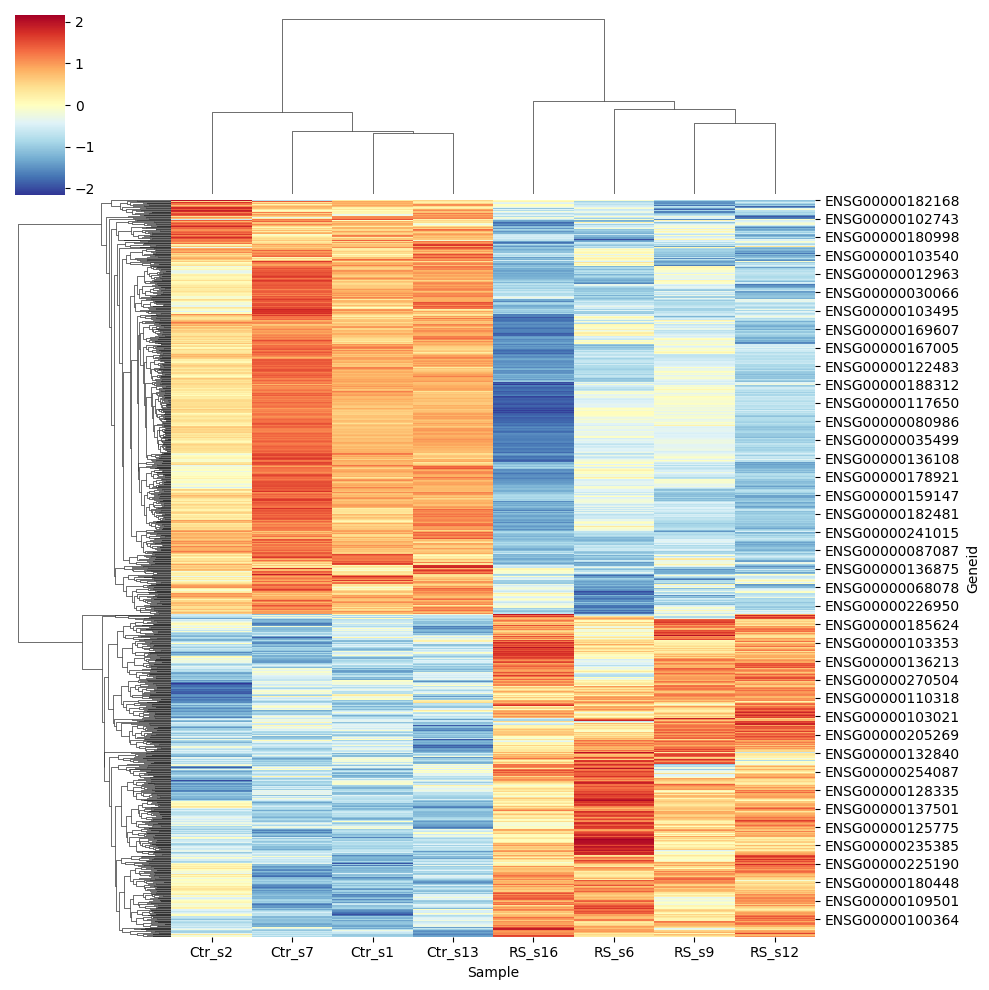

In [58]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')